In [16]:
## importing all the packages we might need later for our calculation
import metpy.calc as mpcalc
import xarray as xr
import numpy as np
from metpy.calc import geostrophic_wind
from metpy.units import units
import metpy.constants as mpconstants
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as creature
from metpy.calc import vorticity

In [14]:
## opening NetCDF file using xarray 

ds = xr.open_mfdataset("/home/jovyan/metpy-cookbook/NETCDF_FILE.nc",combine = "nested", concat_dim="time",decode_times=True)

In [3]:
ds

<xarray.Dataset> Size: 2MB
Dimensions:  (time: 1, lev: 23, lat: 41, lon: 71)
Coordinates:
  * time     (time) datetime64[ns] 8B 2019-06-08
  * lon      (lon) float64 568B -130.5 -129.5 -128.5 ... -62.5 -61.5 -60.5
  * lat      (lat) float64 328B 20.5 21.5 22.5 23.5 24.5 ... 57.5 58.5 59.5 60.5
  * lev      (lev) float64 184B 1e+03 975.0 950.0 925.0 ... 300.0 250.0 200.0
Data variables:
    H        (time, lev, lat, lon) float32 268kB dask.array<chunksize=(1, 23, 41, 71), meta=np.ndarray>
    OMEGA    (time, lev, lat, lon) float32 268kB dask.array<chunksize=(1, 23, 41, 71), meta=np.ndarray>
    PS       (time, lat, lon) float32 12kB dask.array<chunksize=(1, 41, 71), meta=np.ndarray>
    QV       (time, lev, lat, lon) float32 268kB dask.array<chunksize=(1, 23, 41, 71), meta=np.ndarray>
    SLP      (time, lat, lon) float32 12kB dask.array<chunksize=(1, 41, 71), meta=np.ndarray>
    T        (time, lev, lat, lon) float32 268kB dask.array<chunksize=(1, 23, 41, 71), meta=np.ndarray>
    U        (time, lev, lat, lon) float32 268kB dask.array<chunksize=(1, 23, 41, 71), meta=np.ndarray>
    V        (time, lev, lat, lon) float32 268kB dask.array<chunksize=(1, 23, 41, 71), meta=np.ndarray>
Attributes: (12/33)
    CDI:                               Climate Data Interface version 1.9.8 (...
    Conventions:                       CF-1
    History:                           Original file generated: Tue Jun 18 21...
    Comment:                           GMAO filename: d5124_m2_jan10.inst3_3d...
    Filename:                          MERRA2_400.inst3_3d_asm_Np.20190608.nc4
    Institution:                       NASA Global Modeling and Assimilation ...
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2019-06-08
    RangeEndingTime:                   21:00:00.000000
    history_L34RS:                     'Created by L34RS v1.4.3 @ NASA GES DI...
    CDO:                               Climate Data Operators version 1.9.8 (...
    cdo_openmp_thread_number:          12

In [4]:
#### making a function to slice the xarray dataset according to our need.
def slicer (data,lat1, lat2, lon1, lon2, time1,time2) :
    sliced_data = data.sel(lat =slice(lat1, lat2), lon = slice(lon1, lon2),time = slice(time1, time2))
    return sliced_data

In [5]:
#slicing the data for CONUS only

new_data = slicer(ds,23.5,50.5,-125.5,-66.5, ds.time[0], ds.time[0])

In [6]:
new_data

<xarray.Dataset> Size: 942kB
Dimensions:  (time: 1, lev: 23, lat: 28, lon: 60)
Coordinates:
  * time     (time) datetime64[ns] 8B 2019-06-08
  * lon      (lon) float64 480B -125.5 -124.5 -123.5 ... -68.5 -67.5 -66.5
  * lat      (lat) float64 224B 23.5 24.5 25.5 26.5 27.5 ... 47.5 48.5 49.5 50.5
  * lev      (lev) float64 184B 1e+03 975.0 950.0 925.0 ... 300.0 250.0 200.0
Data variables:
    H        (time, lev, lat, lon) float32 155kB dask.array<chunksize=(1, 23, 28, 60), meta=np.ndarray>
    OMEGA    (time, lev, lat, lon) float32 155kB dask.array<chunksize=(1, 23, 28, 60), meta=np.ndarray>
    PS       (time, lat, lon) float32 7kB dask.array<chunksize=(1, 28, 60), meta=np.ndarray>
    QV       (time, lev, lat, lon) float32 155kB dask.array<chunksize=(1, 23, 28, 60), meta=np.ndarray>
    SLP      (time, lat, lon) float32 7kB dask.array<chunksize=(1, 28, 60), meta=np.ndarray>
    T        (time, lev, lat, lon) float32 155kB dask.array<chunksize=(1, 23, 28, 60), meta=np.ndarray>
    U        (time, lev, lat, lon) float32 155kB dask.array<chunksize=(1, 23, 28, 60), meta=np.ndarray>
    V        (time, lev, lat, lon) float32 155kB dask.array<chunksize=(1, 23, 28, 60), meta=np.ndarray>
Attributes: (12/33)
    CDI:                               Climate Data Interface version 1.9.8 (...
    Conventions:                       CF-1
    History:                           Original file generated: Tue Jun 18 21...
    Comment:                           GMAO filename: d5124_m2_jan10.inst3_3d...
    Filename:                          MERRA2_400.inst3_3d_asm_Np.20190608.nc4
    Institution:                       NASA Global Modeling and Assimilation ...
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2019-06-08
    RangeEndingTime:                   21:00:00.000000
    history_L34RS:                     'Created by L34RS v1.4.3 @ NASA GES DI...
    CDO:                               Climate Data Operators version 1.9.8 (...
    cdo_openmp_thread_number:          12

In [7]:
###extracting temperature, pressure, and geopotential from the dataset
gph = new_data.H
p =new_data.lev
T = new_data.T

In [10]:
U,V = geostrophic_wind(gph)

In [21]:
sigma = 2.0e-6 * units('m^2 Pa^-2 s^-2')
f = 2*7.3e-5*np.sin(new_data.lat)*units('s^-1')

In [17]:
vorticity = vorticity (U,V)

In [51]:

f

Magnitude,[-0.00014571997608499185 -8.633819936030815e-05 5.242251968723657e-05 0.0001429862158931719 0.00010208904462164427 -3.2668323467272274e-05 -0.00013739058561807122 -0.00011579657696076363 1.2260270530995037e-05 0.00012904508183769127 0.00012718644002469975 8.393171803318987e-06 -0.00011811673986693835 -0.00013603066562678702 -2.887862474692349e-05 0.00010482429054466004 0.0001421522365314668 4.87860718198694e-05 -8.943378233441858e-05 -0.00014542862945546073 -6.77170653336388e-05 7.22532563626837e-05 0.00014579426737211848 8.529270132433969e-05 -5.362658097359193e-05 -0.00014324183203605218 -0.00010116120331811957 3.392656920170074e-05]
Units,1/second


In [57]:
w_forcing = mpcalc.advection(vorticity[:,16,:,:],(U[:,20,:,:]-U[:,12,:,:]),(V[:,20,:,:]-V[:,12,:,:]))

forcing = np.squeeze((f/sigma)*2*w_forcing)

/tmp/ipykernel_31859/1531930090.py:1: UserWarning: Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.
  w_forcing = mpcalc.advection(vorticity[:,16,:,:],(U[:,20,:,:]-U[:,12,:,:]),(V[:,20,:,:]-V[:,12,:,:]))


In [58]:
forcing

Magnitude,[[4.109374501961353e-07 3.2898205776600606e-07 -1.983392727793503e-07 ... -1.5740016189164942e-07 5.297392169510153e-08 3.2386240522332884e-07] [7.070044720729637e-08 6.732057053240828e-08 -1.1337457387817632e-07 ... -8.45496345609957e-08 -1.0177415908208537e-07 -4.630197596665036e-09] [2.3974378115418233e-08 -1.8708100743074506e-08 1.6563676352999523e-08 ... 1.383975113245134e-08 1.6644663045483013e-07 2.6960954779843617e-07] ... [1.7476981766946369e-06 1.2786518356854074e-06 5.699231010752404e-07 ... 1.273381123000174e-08 1.0862975776350635e-07 2.7514805919326066e-09] [5.157908832900876e-07 2.6901961275665705e-07 7.281435748280814e-08 ... 5.437964595536752e-07 3.8055258517340835e-07 -1.9671332537578623e-07] [-4.6646848612014086e-08 4.0169883407787064e-09 3.347510542804293e-08 ... -4.018546369338516e-07 9.979813056763963e-08 7.821286521257865e-07]]
Units,pascal2/(meter2 second)


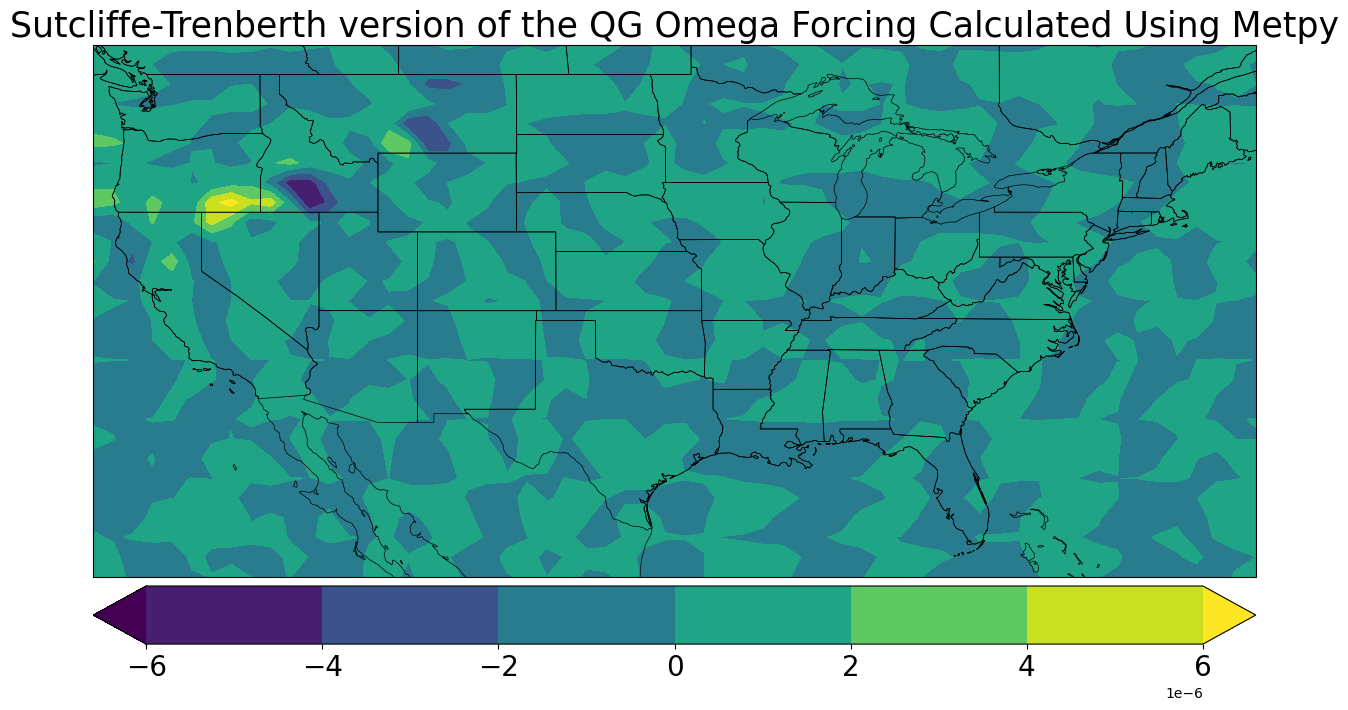

In [61]:
dataproj = ccrs. PlateCarree ()
# # Plot projection
# # The look you want for the view.
plotproj = ccrs. PlateCarree ()
fig=plt.figure(1, figsize=(15.,12.))

ax=plt.subplot(111,projection=plotproj)

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
plt.title("Sutcliffe-Trenberth version of the QG Omega Forcing Calculated Using Metpy",size = 25)

plt.contourf(new_data.lon, new_data.lat, forcing,
                 extend='both', transform=dataproj)
plt.colorbar (orientation = "horizontal", pad=0.01).ax.tick_params(labelsize=20)
# plt.colorbar (orientation = "horizontal", pad=0.01).ax.tick_params(labelsize=20)

plt. show ()




In [55]:
forcing.max()

<xarray.DataArray ()> Size: 8B
<Quantity(7.08878678e-06, 'pascal ** 2 / meter ** 2 / second')>
Coordinates:
    time     datetime64[ns] 8B 2019-06-08
    lev      float64 8B 500.0